In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("diabetes1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
data.loc[data['Insulin']==0,'Insulin']=np.median(data.Insulin)

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnanacies
0,6,0.743719,0.590164,0.353535,0.036052,0.500745,0.234415,0.483333,1,0.352941
1,1,0.427136,0.540984,0.292929,0.036052,0.396423,0.116567,0.166667,0,0.058824
2,8,0.919598,0.524590,0.000000,0.036052,0.347243,0.253629,0.183333,1,0.470588
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0,0.058824
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,0.000000


In [27]:
#scaling of data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data[['Pregnanacies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=scale.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

<AxesSubplot:>

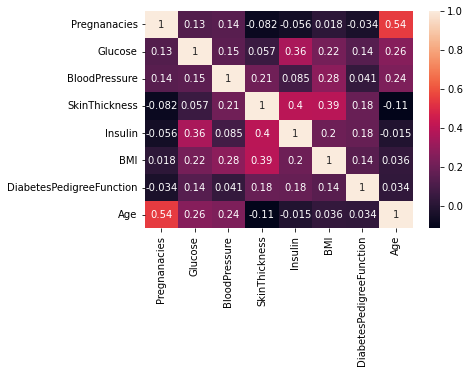

In [29]:
corr_data=data[['Pregnanacies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
sns.heatmap(corr_data.corr(),annot=True)


In [30]:
data.duplicated().sum()

0

In [31]:
#Model crX = data.drop(columns = ['Outcome'])
X = data.drop(columns = ['Outcome'])
y = data.Outcome
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnanacies
0,6,0.743719,0.590164,0.353535,0.019832,0.500745,0.234415,0.483333,0.352941
1,1,0.427136,0.540984,0.292929,0.019832,0.396423,0.116567,0.166667,0.058824
2,8,0.919598,0.524590,0.000000,0.019832,0.347243,0.253629,0.183333,0.470588
3,1,0.447236,0.540984,0.232323,0.096154,0.418778,0.038002,0.000000,0.058824
4,0,0.688442,0.327869,0.353535,0.185096,0.642325,0.943638,0.200000,0.000000
...,...,...,...,...,...,...,...,...,...
763,10,0.507538,0.622951,0.484848,0.199519,0.490313,0.039710,0.700000,0.588235
764,2,0.613065,0.573770,0.272727,0.019832,0.548435,0.111870,0.100000,0.117647
765,5,0.608040,0.590164,0.232323,0.117788,0.390462,0.071307,0.150000,0.294118
766,1,0.633166,0.491803,0.000000,0.019832,0.448584,0.115713,0.433333,0.058824


In [32]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

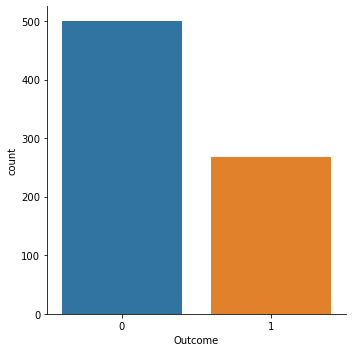

In [37]:
sns.catplot(x='Outcome',data=data,kind='count')

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [38]:
X_smote,y_smote = smote.fit_resample(X,y)

<AxesSubplot:ylabel='count'>

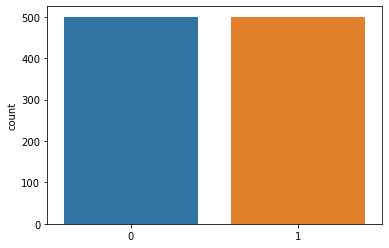

In [41]:
Y_smote = np.array(y_smote)
sns.countplot(Y_smote)

In [44]:
from collections import Counter
print("actual classes ",Counter(y))
print('smote classes',Counter(Y_smote))


actual classes  Counter({0: 500, 1: 268})
smote classes Counter({1: 500, 0: 500})


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_smote,Y_smote,random_state=3)

In [57]:
from sklearn.svm import SVC  
svclassifier = SVC() ## base model with default parameters (default kernel: rbf)
svclassifier.fit(X_train, Y_train)

SVC()

In [59]:
Y_hat = svclassifier.predict(X_test) 

In [62]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(accuracy_score(Y_test,Y_hat))

0.632


In [64]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66       118
           1       0.70      0.53      0.60       132

    accuracy                           0.63       250
   macro avg       0.64      0.64      0.63       250
weighted avg       0.65      0.63      0.63       250



In [65]:
print(f1_score(Y_test,Y_hat))

0.603448275862069


In [68]:
sclassifier= SVC(kernel="linear")
sclassifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [71]:
Y_p = sclassifier.predict(X_test)
print(f1_score(Y_test,Y_p))

0.7404580152671756


In [72]:
classifier = SVC(kernel='poly')
classifier.fit(X_train,Y_train)

SVC(kernel='poly')

In [74]:
Y_pred=classifier.predict(X_test)
print(f1_score(Y_test,Y_pred))

0.48704663212435223


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean()) #get the mean value of scores to determine the overall accuracy of the model
print("Std :",scores.std())
#std of < 0.05 is good 

[0.62111801 0.55696203 0.61538462]
Cross validation Score: 0.5978215510411437
Std : 0.02898670490912393


In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  

    
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.643 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.656 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.682 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.535 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.578 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.518 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.519 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.541 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.490 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.016 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.078 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [81]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01}
SVC(C=1000, gamma=0.01, random_state=42)


In [88]:
clf=SVC(C=1000, gamma=0.01,random_state=42)
clf.fit(X_train,Y_train)

SVC(C=1000, gamma=0.01, random_state=42)

In [89]:
y_clf=clf.predict(X_test)
print(classification_report(Y_test,y_clf))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       118
           1       0.77      0.73      0.75       132

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



In [91]:
f1=f1_score(Y_test,y_clf)
f1

0.7470817120622568

In [92]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.62790698 0.59756098 0.62937063]
Cross validation Score: 0.6182795272415239
Std : 0.02898670490912393
